# REGRESIÓN LINEAL MÚLTIPLE

## 0. Importar las librerias

In [3]:
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
import pandas as pd
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns
import sklearn

%matplotlib inline

## 1. Datos

### Descripción

Dataset que relaciona las ventas (Sales) con tres tipos de publicidad (Radio, TV, Prensa).
(https://www.kaggle.com/datasets/ashydv/advertising-dataset)

In [4]:
df = pd.read_csv('..\Datasets\Advertising.csv')


## 2. Análisis Exploratorio

### 2.1 Información básica

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


<Figure size 720x720 with 0 Axes>

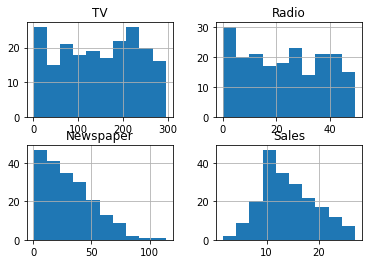

In [14]:
df.iloc[:,1:].hist()
plt.show()

### 2.2 Limpieza

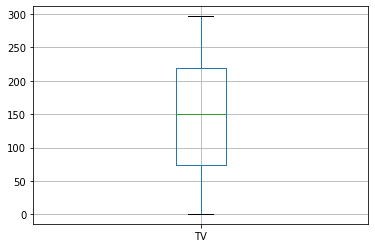

In [5]:
atributo_de_interes = 'TV'
df.boxplot(column=[atributo_de_interes])
plt.show()

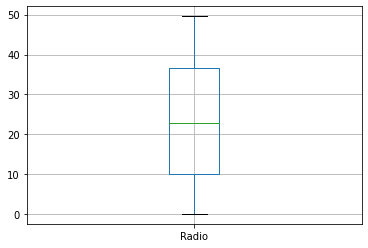

In [6]:
atributo_de_interes = 'Radio'
df.boxplot(column=[atributo_de_interes])
plt.show()

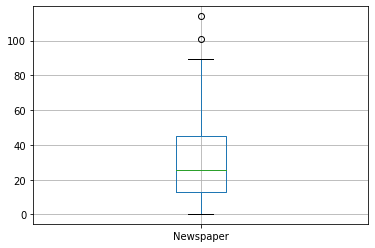

In [7]:
atributo_de_interes = 'Newspaper'
df.boxplot(column=[atributo_de_interes])
plt.show()

In [10]:
df_clean = df.drop(['Unnamed: 0'], axis=1)

In [11]:
df_clean.shape

(200, 4)

### 2.3 Correlaciones

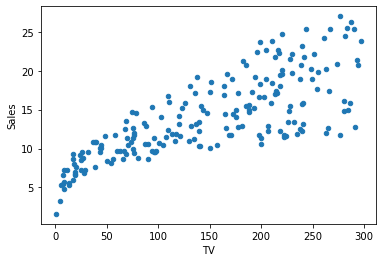

In [30]:
df_clean.plot.scatter(x='TV',y='Sales')
plt.show()

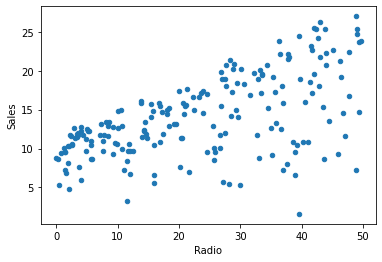

In [32]:
df_clean.plot.scatter(x='Radio',y='Sales')
plt.show()

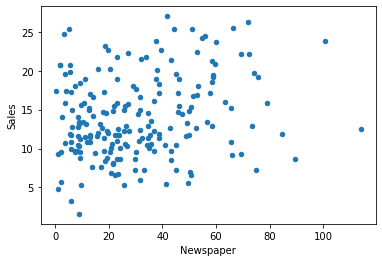

In [33]:
df_clean.plot.scatter(x='Newspaper',y='Sales')
plt.show()

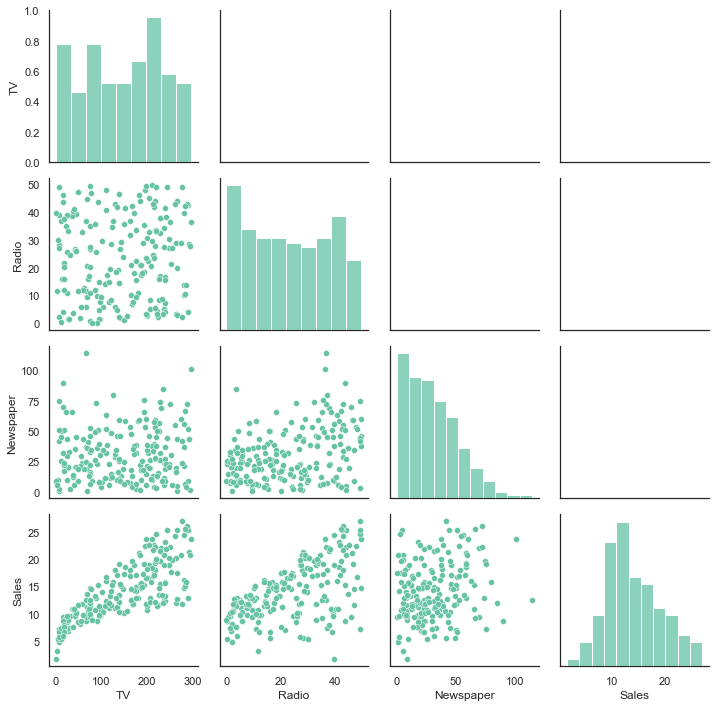

In [34]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean,diag_sharey=False, corner=False)

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

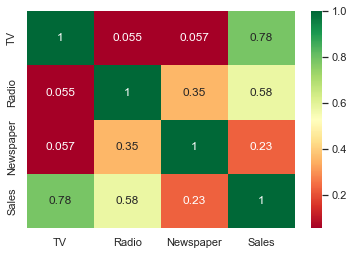

In [35]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

## 3. Modelo

### 3.1 Crear Modelo

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

# 2. Choose model hyperparameters

Cada modelo tiene sus porpios hiperparámetros.

En el caso de la Regresión Lineal, se pueden consultar sus hiperparámetros en:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
- normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

En este ejemplo vamos a usar los hiperparámtros por defecto.

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

### 3.2 Preaparación y Particionamiento de los datos

- Crear los conjutos de entrenamiento y prueba (se puede crear también uno de validación, de acuerdo a la metodología que se esté utilizando).
- Revisar dimensiones y tipos, de tal forma que se puedan usar en las siguientes etapas.
- Normalizar si se considera necesario.

In [12]:
from sklearn.model_selection import train_test_split

y = df_clean['Sales'].values
X = df_clean[['TV','Radio','Newspaper']].values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(200,)
<class 'numpy.ndarray'>
(200, 3)


In [13]:
y = y.reshape(-1, 1)
print(y.shape)

(200, 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160, 1)
(40, 3)
(40, 1)


### 3.3 Entrenar Modelo

In [15]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [16]:
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1,w2,w3]=', lin_reg_model.coef_)

intercept [w0]= [2.97906734]
slope [w1,w2,w3]= [[0.04472952 0.18919505 0.00276111]]


## 4. Evaluación

### 4.1 Evaluar el modelo en el conjunto de entrenamiento

In [17]:
y_pred_train = lin_reg_model.predict(X_train)

In [18]:
r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

coefficient R^2 for training data: 0.8957


In [19]:
e_train = y_train - y_pred_train

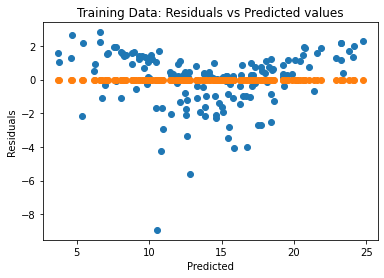

In [20]:
plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

In [22]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

MSE= 2.7051
RMSE: 1.6447


### 4.2 Evaluar el modelo en el conjunto de prueba

In [23]:
y_pred_test = lin_reg_model.predict(X_test)

In [24]:
r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

coefficient R^2 for test data: 0.8994


In [25]:
e_test = y_test - y_pred_test

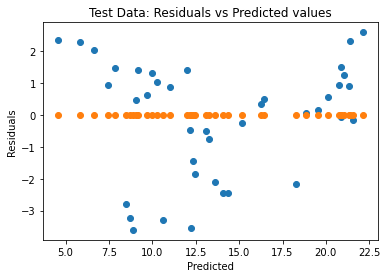

In [26]:
plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

In [27]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

MSE= 3.1741
RMSE: 1.7816


## 5. Repetir los pasos 3 y 4 probando otros modelos con el objetivo de encontrar uno que pueda tener un mejor desempeño.

In [28]:
lin_reg_model = LinearRegression()

y = df_clean['Sales'].values
y = y.reshape(-1, 1)
X = df_clean[['TV']].values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model.fit(X_train,y_train)

print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 1)
intercept [w0]= [7.11963843]
slope [w1]= [[0.04652973]]


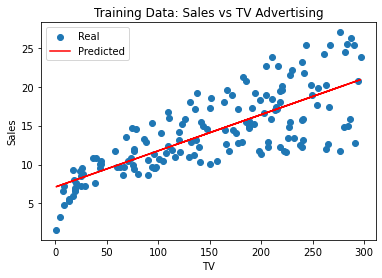

coefficient R^2 for training data: 0.5912


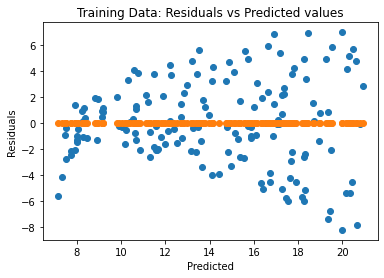

MSE= 10.6036
RMSE: 3.2563


In [29]:
# EVALUAR USANDO EL CONJUNTO DE ENTRENAMIENTO

y_pred_train = lin_reg_model.predict(X_train)

plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train, y_pred_train, 'r', label='Predicted')
plt.title('Training Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

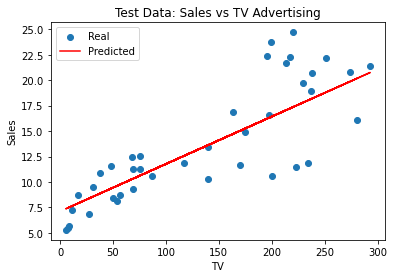

coefficient R^2 for test data: 0.6767


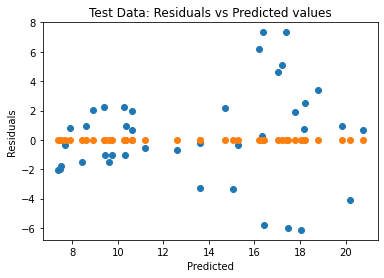

MSE= 10.2047
RMSE: 3.1945


In [30]:
# EVALUAR USANDO EL CONJUNTO DE PRUEBA

y_pred_test = lin_reg_model.predict(X_test)

plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test, y_pred_test, 'r', label='Predicted')
plt.title('Test Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

In [31]:
lin_reg_model = LinearRegression()

y = df_clean['Sales'].values
y = y.reshape(-1, 1)
X = df_clean[['Radio']].values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model.fit(X_train,y_train)

print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 1)
intercept [w0]= [9.42406565]
slope [w1]= [[0.20440685]]


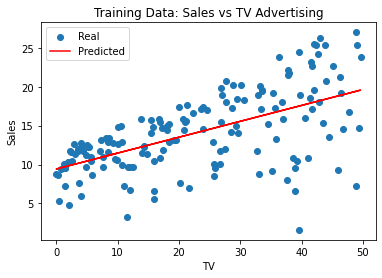

coefficient R^2 for training data: 0.3509


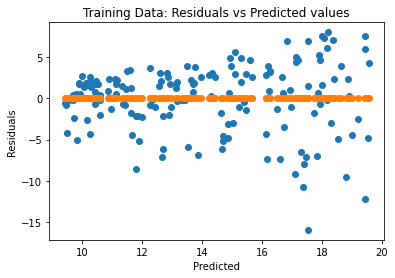

MSE= 16.8351
RMSE: 4.1031


In [32]:
# EVALUAR USANDO EL CONJUNTO DE ENTRENAMIENTO

y_pred_train = lin_reg_model.predict(X_train)

plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train, y_pred_train, 'r', label='Predicted')
plt.title('Training Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

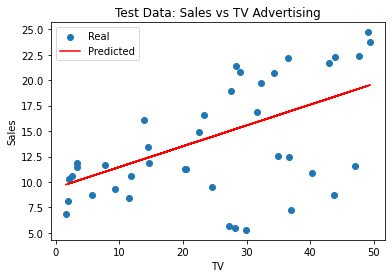

coefficient R^2 for test data: 0.2634


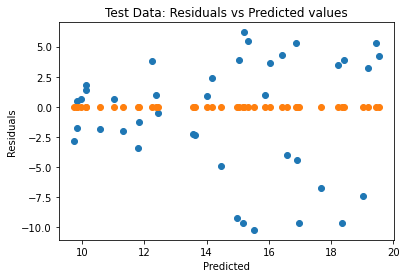

MSE= 23.2488
RMSE: 4.8217


In [33]:
# EVALUAR USANDO EL CONJUNTO DE PRUEBA

y_pred_test = lin_reg_model.predict(X_test)

plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test, y_pred_test, 'r', label='Predicted')
plt.title('Test Data: Sales vs TV Advertising')
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

In [35]:
lin_reg_model = LinearRegression()

y = df_clean['Sales'].values
y = y.reshape(-1, 1)
X = df_clean[['TV','Radio']].values

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model.fit(X_train,y_train)

print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1,w2]=', lin_reg_model.coef_)

<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 2)
intercept [w0]= [3.02825525]
slope [w1,w2]= [[0.0447283  0.19066726]]


coefficient R^2 for training data: 0.8956


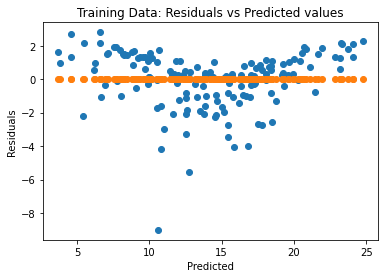

MSE= 2.7078
RMSE: 1.6455


In [36]:
# EVALUAR USANDO EL CONJUNTO DE ENTRENAMIENTO

y_pred_train = lin_reg_model.predict(X_train)

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

coefficient R^2 for test data: 0.9006


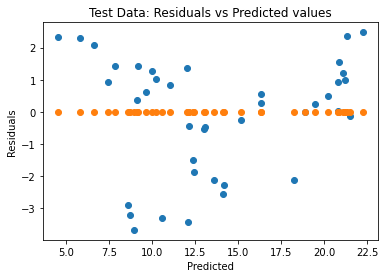

MSE= 3.1379
RMSE: 1.7714


In [37]:
# EVALUAR USANDO EL CONJUNTO DE PRUEBA

y_pred_test = lin_reg_model.predict(X_test)

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
a = np.zeros(len(e_test))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)